In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chkpt = "results/checkpoints_20200425-2305"
chkpt = "results/checkpoints_20200501-1527/"
# chkpt = "org_checkpoints_20200425-2347"
fewer_epochs = 25
epochs = 25

In [3]:
import tensorflow as tf
file_writer = tf.summary.create_file_writer(chkpt + "/val_losses")
file_writer.set_as_default()

In [4]:
from scipy.special import expit, logit
mn, mx = expit(-1), expit(1)
norm = lambda x: (x - mn) / (mx - mn)
norm = lambda x: x

# Training
---
## Losses

In [5]:
with open(f"{chkpt}/train_losses.pkl", "rb") as handle:
    train_losses = pickle.load(handle)
    
print(type(train_losses))
train_losses = np.asarray(train_losses).reshape((fewer_epochs, -1))
# train_losses = norm(train_losses)

<class 'torch.Tensor'>


In [6]:
for i, tl in enumerate(train_losses): 
    tf.summary.histogram("train_losses", tl, step=i)

# Probs

In [7]:
with open(f"{chkpt}/train_preds.pkl", "rb") as handle:
    train_preds = pickle.load(handle)
train_preds = np.asarray([p.detach().numpy() for p in train_preds]).reshape((fewer_epochs, -1))
train_preds = norm(train_preds)

In [8]:
for i, tp in enumerate(train_preds): 
    tf.summary.histogram("train_preds", tp, step=i)

# Validation
---
## Losses

In [9]:
val_dicts = []
for i in range(1, epochs+1):
    with open(f"{chkpt}/validation_epoch_{i:02d}.pth", "rb") as handle:
        val_dicts.append(pickle.load(handle))

In [10]:
val_losses = np.asarray([vd["losses"].numpy() for vd in val_dicts])
for i, vl in enumerate(val_losses): 
    tf.summary.histogram("val_losses", vl, step=i)

In [11]:
print(train_losses.mean(axis=-1), "\n")
print(val_losses.mean(axis=-1), "\n")

[0.5643217  0.50677496 0.50866795 0.54726106 0.6229986  0.60646355
 0.56689805 0.5499185  0.5478121  0.5891282  0.5673062  0.5349117
 0.6493038  0.49475107 0.56003255 0.5770194  0.54237306 0.6582781
 0.6254104  0.5446534  0.5738472  0.5535309  0.53617907 0.56636393
 0.58353174] 

[2.0424898  1.3493668  1.0264792  1.7352953  1.1522635  1.034916
 0.8097803  0.77024233 0.67679334 0.6752505  0.65822166 0.70968664
 0.6875702  0.68222296 0.597913   0.58639455 0.57710516 0.5704597
 0.57468116 0.5692267  0.5675239  0.56237686 0.55594957 0.5625066
 0.54684955] 



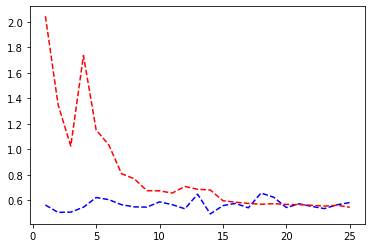

In [12]:
plt.plot(range(epochs-fewer_epochs+1, epochs+1), train_losses.mean(axis=-1), '--', c="blue")
plt.plot(range(1, epochs+1), val_losses.mean(axis=-1), '--', c="red")

(8,)
(200,)


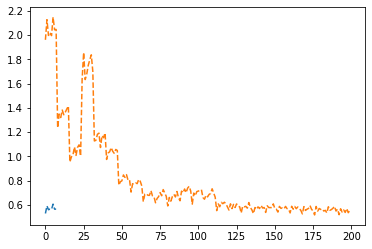

In [13]:
train_batches = train_losses.flatten().reshape((-1, 500)).mean(axis=-1)
val_batches = val_losses.flatten().reshape((-1, 500)).mean(axis=-1)
print(train_batches.shape)
print(val_batches.shape)
plt.plot(range(8), train_batches, '--')
plt.plot(range(200), val_batches, '--')

## Probs

In [14]:
val_probs = np.asarray([vd["probs"].numpy() for vd in val_dicts])
val_probs = norm(val_probs)
for i, vp in enumerate(val_probs):
    print(i)
    tf.summary.histogram("val_probs", vp, step=i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [15]:
from scipy.special import expit
mn, mx = expit(-1), expit(1)
norm = lambda x: (x - mn) / (mx - mn)
norm(val_probs).max()

1.581945

In [16]:
rands = expit(np.random.uniform(-1, 1, 100000))

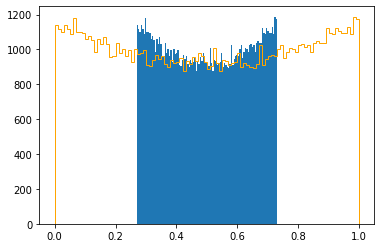

In [17]:
_ = plt.hist(rands, bins=100)
_ = plt.hist(norm(rands), bins=100, color="orange", histtype="step")

In [18]:
expit(-1), logit(0.4), expit(1)

(0.2689414213699951, -0.4054651081081643, 0.7310585786300049)